In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from pathlib import Path
from tqdm import tqdm
import json

import numpy as np # linear algebra
import pandas as pd
import math

import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 10
plt.rcParams['figure.figsize'] = (15, 5)
import seaborn as sns
from PIL import Image

from collections import Counter
from collections import defaultdict

from keras.layers import *
from keras.models import Model
from keras.optimizers import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Steel/train.csv')
train_df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [5]:
# Transform class to column
try:
    train_df['fname'], train_df['cls'] = zip(*train_df['ImageId_ClassId'].str.split('_'))
except:
    train_df['fname'], train_df['cls'] = train_df['ImageId'], train_df['ClassId']
train_df['cls'] = train_df['cls'].astype(int)
train_df = train_df.pivot(index='fname',columns='cls',values='EncodedPixels')
train_df['defects'] = train_df.count(axis=1)
#train_df.reset_index()
train_df.head(10)

cls,1,2,3,4,defects
fname,,,,,
0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1
0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1
000a4bcdd.jpg,37607 3 37858 8 38108 14 38359 20 38610 25 388...,NaN,NaN,NaN,1
000f6bf48.jpg,NaN,NaN,NaN,131973 1 132228 4 132483 6 132738 8 132993 11 ...,1
0014fce06.jpg,NaN,NaN,229501 11 229741 33 229981 55 230221 77 230468...,NaN,1
0025bde0c.jpg,NaN,NaN,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,315139 8 315395 15 315651 16 315906 17 316162 ...,2
002af848d.jpg,NaN,NaN,NaN,290800 6 291055 13 291311 15 291566 18 291822 ...,1
002fc4e19.jpg,146021 3 146275 10 146529 40 146783 46 147038 ...,145658 7 145901 20 146144 33 146386 47 146629 ...,NaN,NaN,2
0030401a5.jpg,NaN,NaN,NaN,186833 1 187089 3 187344 6 187600 7 187855 10 ...,1


In [6]:
defect_num = 0

for col in range(len(train_df)):
  labels = train_df.iloc[col]

  if labels[1:].isna().all:
    defect_num += 1

In [7]:
no_defect_num = 12578 - defect_num
print("the number of images with no defects: {}".format(no_defect_num))
print("the number of images with defects: {}".format(defect_num))

the number of images with no defects: 5912
the number of images with defects: 6666


Text(0.5, 1.0, 'number of images')

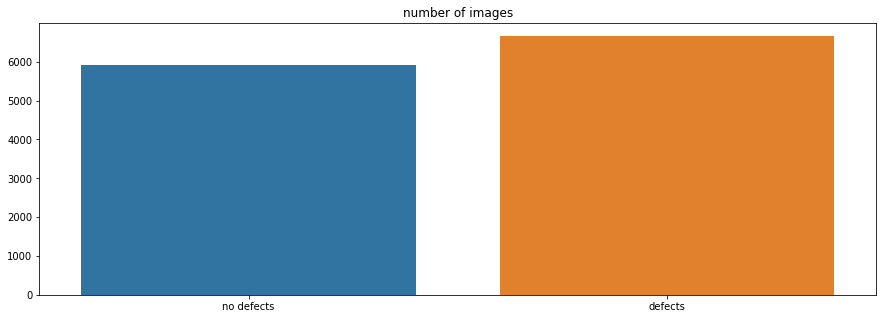

In [8]:
data = [no_defect_num, defect_num]
labels = ['no defects', 'defects']
fig, ax = plt.subplots()
sns.barplot(x = labels, y = data, ax = ax)
ax.set_title("number of images")

In [9]:
class_defects = len(train_df) - train_df.isnull().sum() 
c = class_defects[:4]
print(c)

cls
1     897
2     247
3    5150
4     801
dtype: int64


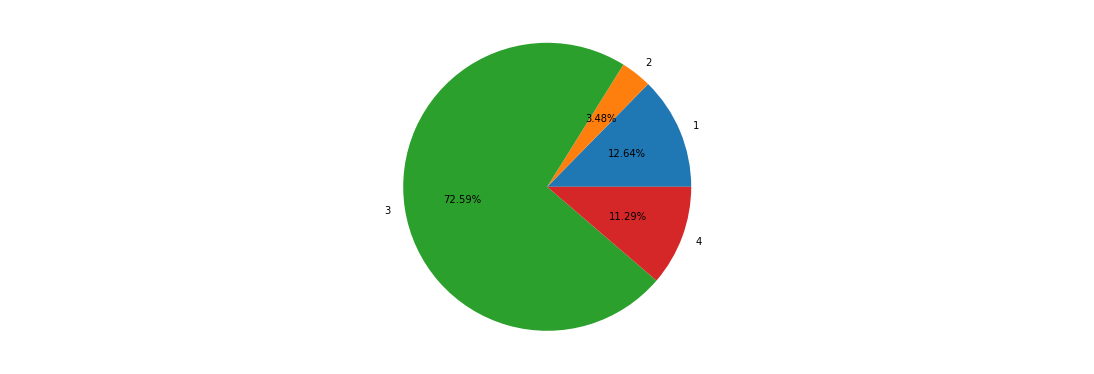

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
types = ['1', '2', '3', '4']
classes = c
ax.pie(classes, labels = types,autopct='%1.2f%%')
plt.show()

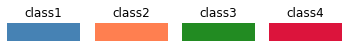

In [11]:
palet = [(70,130,180), (255,127,80), (34,139,34), (220,20,60)]

fig, ax = plt.subplots(1, 4, figsize=(6, 2))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(np.ones((10, 40, 3), dtype=np.uint8) * palet[i])
    ax[i].set_title(f"class{i+1}")

plt.show()

In [12]:
def mask2rgba(mask):
    rgba_list = []
    for idx in range(4):    # idx: class id
        rgba = cv2.cvtColor(mask[:, :, idx], cv2.COLOR_GRAY2RGBA)
        rgba[:, :, :3] = rgba[:, :, :3] /255 * palet[idx]
        rgba_list.append(rgba)
    return rgba_list

In [13]:
def make_mask(row_id):
    fname = train_df.iloc[row_id].name

    labels = train_df.iloc[row_id][:4]
    masks = np.zeros((256, 1600, 4), dtype=np.uint8)    # 4:class 1～4 (ch:0～3)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            mask = np.zeros(256 * 1600, dtype=np.uint8)
            for pos, le in zip(positions, length):
                mask[pos:(pos + le)] = 255
            masks[:, :, idx] = mask.reshape(256, 1600, order='F')
    return fname, masks

In [14]:
def show_mask_image(row_id, contour = True):
    name, mask = make_mask(row_id)
    img = cv2.imread(os.path.join('/content/drive/MyDrive/Steel/train_images', name))

    if contour:
        for ch in range(4):
            contours, _ = cv2.findContours(mask[:, :, ch],
                            cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
            for i in range(0, len(contours)):
                cv2.polylines(img, contours[i], True, palet[ch], 2)
    else:
        for ch in range(4):
            img[mask[:,:,ch]==255] = palet[ch]
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_title(name)
    ax.imshow(img)
    ax.axis('off')
    plt.show()

In [15]:
# classify defects
idx_class_1 = list(filter(lambda r:not pd.isna(train_df.iloc[r,0]), range(len(train_df))))
idx_class_2 = list(filter(lambda r:not pd.isna(train_df.iloc[r,1]), range(len(train_df)))) 
idx_class_3 = list(filter(lambda r:not pd.isna(train_df.iloc[r,2]), range(len(train_df))))
idx_class_4 = list(filter(lambda r:not pd.isna(train_df.iloc[r,3]), range(len(train_df))))

idx_class_multi = list(filter(lambda r:train_df.iloc[r,4] >= 2, range(len(train_df))))

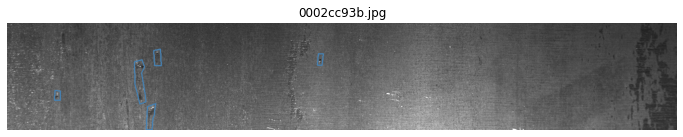

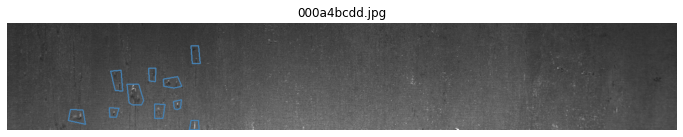

In [16]:
# class_1 defect sumple (Yellow)
for idx in idx_class_1[:2]:
    show_mask_image(idx, contour=True)

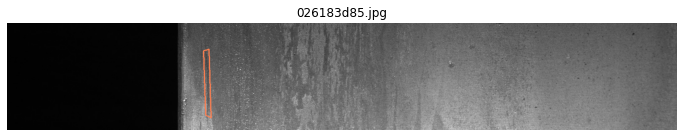

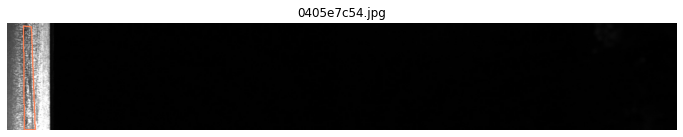

In [17]:
# class_2 defect sumple (lightblue)
for idx in idx_class_2[4:6]:
    show_mask_image(idx, contour=True)

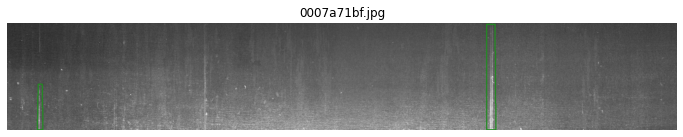

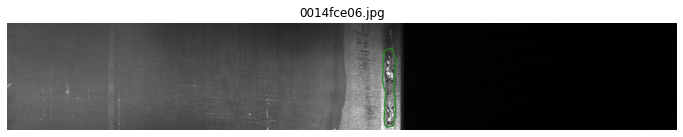

In [18]:
# class_3 defect sumple (purple)
for idx in idx_class_3[:2]:
    show_mask_image(idx, contour=True)

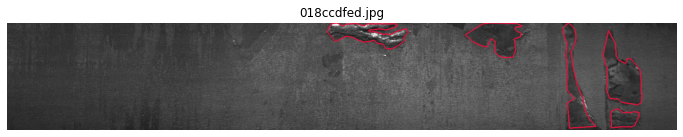

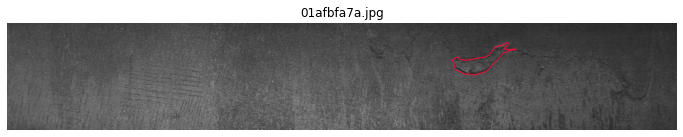

In [19]:
# class_4 defect sumple (red)
for idx in idx_class_4[7:9]:
    show_mask_image(idx, contour=True)

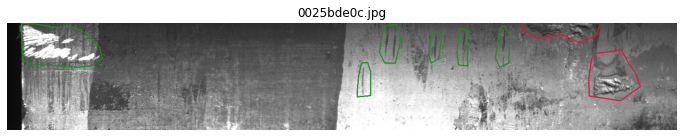

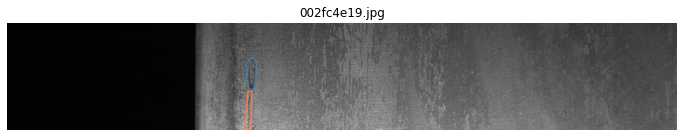

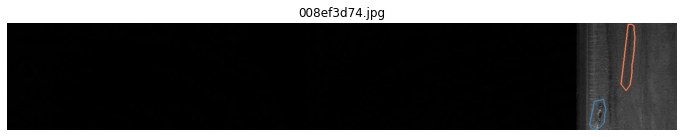

In [20]:
# contain multi class defects
for idx in idx_class_multi[:3]:
    show_mask_image(idx, contour=True)

**UNET**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
input_shape = (256, 1600, 3)
inputs = Input(input_shape)

c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (inputs)
c1 = Conv2D(8, (3, 3), activation='relu', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (p4)
c5 = Conv2D(64, (3, 3), activation='relu', padding='same') (c5)
p5 = MaxPooling2D(pool_size=(2, 2)) (c5)

c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (p5)
c55 = Conv2D(128, (3, 3), activation='relu', padding='same') (c55)

u6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c55)
u6 = concatenate([u6, c5])
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u71 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c6)
u71 = concatenate([u71, c4])
c71 = Conv2D(32, (3, 3), activation='relu', padding='same') (u71)
c61 = Conv2D(32, (3, 3), activation='relu', padding='same') (c71)

u7 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c61)
u7 = concatenate([u7, c3])
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

outputs = Conv2D(4, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 1600,   0           []                               
                                3)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 256, 1600, 8  224         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 1600, 8  584         ['conv2d[0][0]']                 
                                )                                                             

In [21]:
def dice_coef(y_true, y_pred, smooth = 1):

  '''
  This function returns dice coeff of similarity between y_true and y_predict
  Dice coeff is also kniwn as F1 score but we use this name for image segmentation models
  this metric firt converts the above into [1,1,0,1] and [1,0,0,1],
  then intersection is calculated as 1*1 + 1*0 + 0*1 + 1*1 = 2 and sum(y_true) + sum(y_pred) = 3 + 2 = 5
  this returns the value (2 * 2 + 1)/(3 + 2 + 1) ~ 0.8 

  '''

  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
  smooth = 1.
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = y_true_f * y_pred_f
  score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
  return 1. - score
def bce_dice_loss(y_true, y_pred):
  return K.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

In [22]:
adamax = tf.keras.optimizers.Adamax()
model.compile(optimizer= adamax, loss = 'binary_crossentropy', 
              metrics=[
                 dice_coef
             ])

NameError: ignored

**DATA GENERATOR**

In [ ]:
import imgaug as ia
from imgaug import augmenters as iaa

In [ ]:
DIRtrain = '/content/drive/MyDrive/Steel/train_images'
def train_data_gen(ids, batch_size):
  Xs = []; Ys = []
  while True:
    for i in ids:
      name, mask = make_mask(i)
      img = cv2.imread(os.path.join(DIRtrain, name), cv2.IMREAD_GRAYSCALE)
      img = img[..., np.newaxis] #Add channel axis (height, width, channel = 1)
      img = img/255 #Normalize pixels in the range 0 - 1
      mask = mask/255
      transformed_img = seq.augment_image(img)
      transformed_mask = seq.augment_image(mask)
      Xs.append(transformed_img); Ys.append(transformed_mask)
      if len(Xs) == batch_size: #if Xs appends till the the batch_size i.e 16
        X = np.array(Xs); Y = np.array(Ys) #list of numpy arrays
        # if preprocess!=None: X = preprocess(X)
        Xs = []; Ys = [] #reset the list for the next batch 
        yield [X, Y] #similar to return fnc, it returns Img with corr. mask in a sequence. Diff betwn yield and return is return stops after it is executed while yield returns in seq without stopping


In [ ]:
def val_data_gen(ids, batch_size):
  Xs = []; Ys = []
  while True:
    for i in ids:
      name, mask = make_mask(i)
      img = cv2.imread(os.path.join(DIRtrain, name), cv2.IMREAD_GRAYSCALE)
      img = img[..., np.newaxis] #Add channel axis (height, width, channel = 1)
      img = img/255 #Normalize pixels in the range 0 - 1
      mask = mask/255
      Xs.append(img); Ys.append(mask)
      if len(Xs) == batch_size: #if Xs appends till the the batch_size i.e 16
        X = np.array(Xs); Y = np.array(Ys) #list of numpy arrays
        # if preprocess!=None: X = preprocess(X)
        Xs = []; Ys = [] #reset the list for the next batch 
        yield [X, Y] #similar to return fnc, it returns Img with corr. mask in a sequence. Diff betwn yield and return is return stops after it is executed while yield returns in seq without stopping

In [ ]:
# Train Data
import imgaug as ia
import imgaug.augmenters as iaa
seq = iaa.Sequential([ #Augemneting the images
    # iaa.Sharpen((0.0, 1.0)), # sharpen the image
    iaa.Fliplr(),
    iaa.Flipud(),
], random_order=True)
train_ids, val_ids = train_test_split(range(len(train_df)), test_size=0.15, random_state = 1029)
train_gen = train_data_gen(train_ids, batch_size = 16)
val_gen = val_data_gen(val_ids, batch_size = 16)

In [ ]:
for X, Y in train_data_gen(range(len(train_df)), 6):
  break
print('X.shape:', X.shape, 'Y.shape:',Y.shape)

X.shape: (6, 256, 1600, 1) Y.shape: (6, 256, 1600, 4)


In [ ]:
len(train_ids)

5666

In [ ]:
len(val_ids)

1000

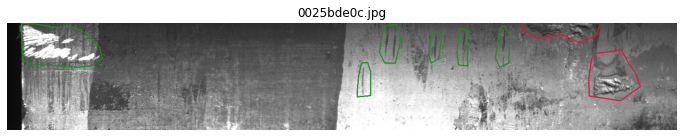

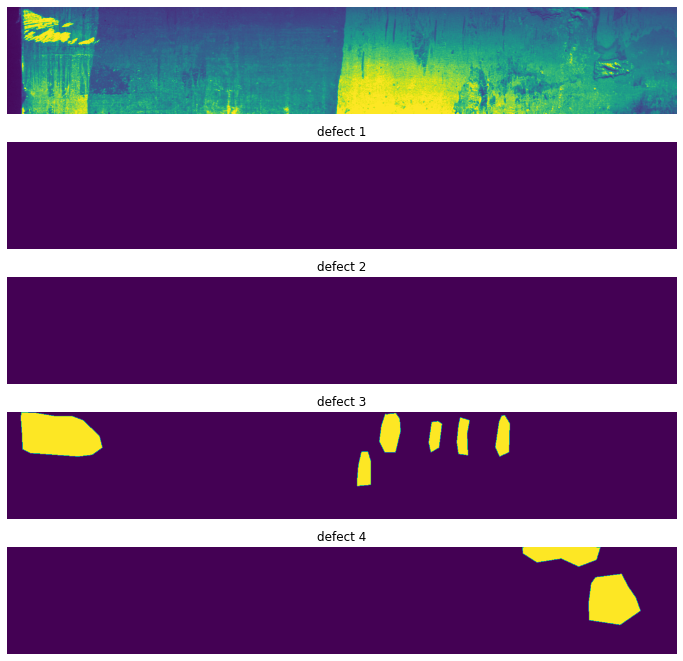

In [ ]:
row = 5
#From train_df
show_mask_image(row, contour = True)
#From generator
fig, axs = plt.subplots(5, figsize = (12, 12))
axs[0].imshow(X[row,:,:,-1])
axs[0].axis('off')
for i in range(4):
  axs[i+1].imshow(Y[row,:,:,i])
  axs[i+1].set_title(f"defect {i+1}")
  axs[i+1].axis('off')

In [23]:
#Callback
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
filepath = 'defect_detection.h5'
checkpoint = ModelCheckpoint(filepath, monitor = 'val_dice_coef',
                             verbose = 1, save_best_only = True, mode = 'max')
ReduceLROnPlateau = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, min_lr= 0.001, factor= 0.1)
# EarlyStopping = EarlyStopping(monitor='loss', patience=3)
callbacks_list = [checkpoint, ReduceLROnPlateau]

In [ ]:
##Training conditions
batch_size = 16

NoTRAIN = False    # True:No further training, use pre-learned weights
RESUME = False    # True:Resume Training, False: Start from the beginning

if RESUME:
    initial_epoch = 30    # initial_epoch when training resumes
else:
    initial_epoch = 0
epochs = initial_epoch + 30
steps_per_epoch = 100

In [ ]:
if NoTRAIN == False or RESUME:
    history = model.fit_generator(generator=train_gen,
                              steps_per_epoch=steps_per_epoch,
                              initial_epoch=initial_epoch,
                              epochs=epochs,
                              validation_data=val_gen,
                              validation_steps = len(val_ids)//batch_size,
                              verbose=2,
                              shuffle=True,
                              callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/30

Epoch 1: val_dice_coef improved from -inf to 0.03099, saving model to defect_detection.h5
100/100 - 329s - loss: 0.2127 - dice_coef: 0.0197 - val_loss: 0.0759 - val_dice_coef: 0.0310 - lr: 0.0010 - 329s/epoch - 3s/step
Epoch 2/30

Epoch 2: val_dice_coef improved from 0.03099 to 0.04052, saving model to defect_detection.h5
100/100 - 230s - loss: 0.0693 - dice_coef: 0.0410 - val_loss: 0.0670 - val_dice_coef: 0.0405 - lr: 0.0010 - 230s/epoch - 2s/step
Epoch 3/30

Epoch 3: val_dice_coef improved from 0.04052 to 0.04866, saving model to defect_detection.h5
100/100 - 219s - loss: 0.0651 - dice_coef: 0.0435 - val_loss: 0.0656 - val_dice_coef: 0.0487 - lr: 0.0010 - 219s/epoch - 2s/step
Epoch 4/30

Epoch 4: val_dice_coef did not improve from 0.04866
100/100 - 161s - loss: 0.0621 - dice_coef: 0.0461 - val_loss: 0.0661 - val_dice_coef: 0.0397 - lr: 0.0010 - 161s/epoch - 2s/step
Epoch 5/30

Epoch 5: val_dice_coef improved from 0.04866 to 0.07144, saving model to defect_detection.h5
100

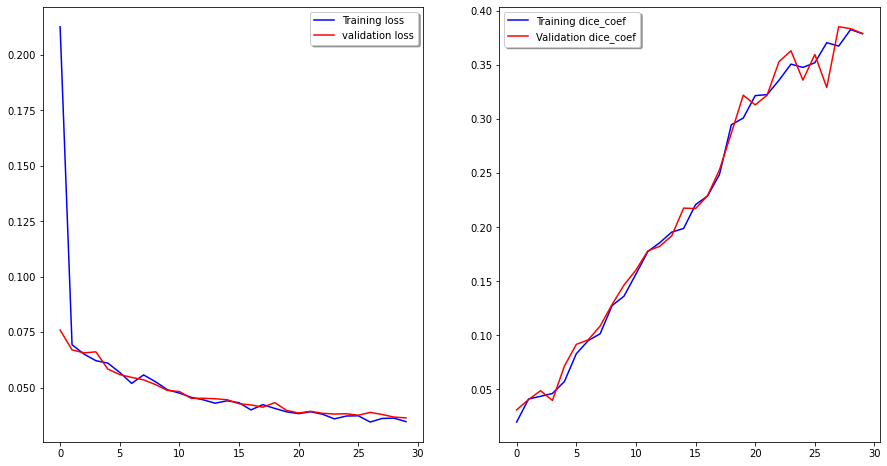

In [ ]:
# Plot the loss and dice_coef curves
if (NoTRAIN or RESUME) and os.path.exists(history_path):
    hist_df = pd.read_csv(history_path)        # Load previous training history
if RESUME and os.path.exists(history_path):
    hist_df1 = pd.DataFrame(history.history)[['loss','val_loss','dice_coef','val_dice_coef']]
    hist_df = pd.concat([hist_df, hist_df1], ignore_index=True)    # Concat history
elif NoTRAIN == False and RESUME == False:
    hist_df = pd.DataFrame(history.history)[['loss','val_loss','dice_coef','val_dice_coef']]

# Plot
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(hist_df['loss'], color='b', label="Training loss")
ax[0].plot(hist_df['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist_df['dice_coef'], color='b', label="Training dice_coef")
ax[1].plot(hist_df['val_dice_coef'], color='r',label="Validation dice_coef")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Save history (for next Resume)
hist_df.to_csv("DefectDetection_history.csv", index=False)

**Predict**

In [ ]:
# Load the weights that had the best score for predict
if NoTRAIN == False or RESUME:
    model.load_weights("/content/defect_detection.h5")

In [ ]:
# Binarize the mask output by NN
def binarize(masks, th = 0.5):
    # Maximum value of each channel per pixel
    mask_max = np.zeros_like(masks[:,:,0])
    mask_max = np.fmax(masks[:,:,0],masks[:,:,1])
    mask_max = np.fmax(mask_max,masks[:,:,2])
    mask_max = np.fmax(mask_max,masks[:,:,3])
    # Remove non-maximum pixels
    m = np.zeros_like(masks)
    for ch in range(4):
        m[:,:,ch] = (masks[:,:,ch] == mask_max) * masks[:,:,ch]
    # Binarization
    m = (m>th) * 1
    return m

In [ ]:
def plot_pred_and_target_mask(idx): # idx
    name = train_df.iloc[idx].name
    img = cv2.imread(os.path.join(DIRtrain, name),
                         cv2.IMREAD_GRAYSCALE)
    name, mask = make_mask(idx) # true mask

    img_ = img[..., np.newaxis]    # Add channel axis
    img_ = img_[np.newaxis, ...]    # Add batch axis
    img_ = img_ / 255.              # 0～1
    mask = mask / 255.
    pred_masks = model.predict(img_)
    bin_masks = binarize(pred_masks[0, ...], 0.5)
    
    show_mask_image(idx, contour=True)
    fig, axs = plt.subplots(4,2, figsize=(12, 6))

    for i in range(4):
        axs[i,0].imshow(mask[:,:,i])
        axs[i,0].axis('off')
        axs[i,0].set_title('Groundtruth class '+ str(i+1))
        axs[i,1].imshow(bin_masks[:,:,i])
        axs[i,1].axis('off')
        axs[i,1].set_title('Predicted class '+ str(i+1))

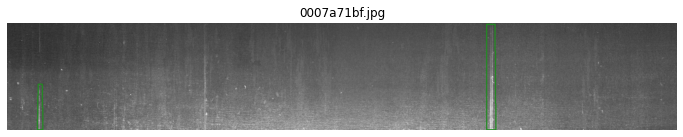

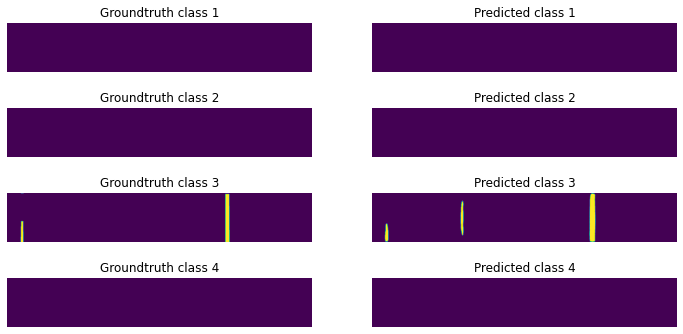

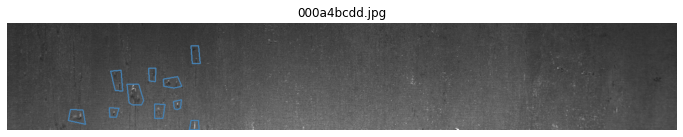

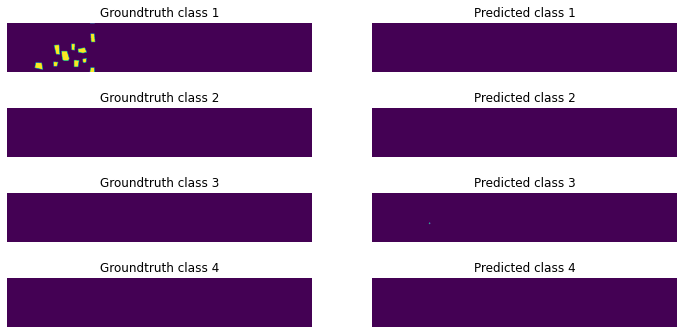

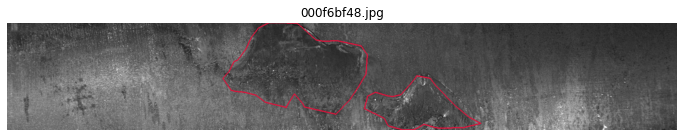

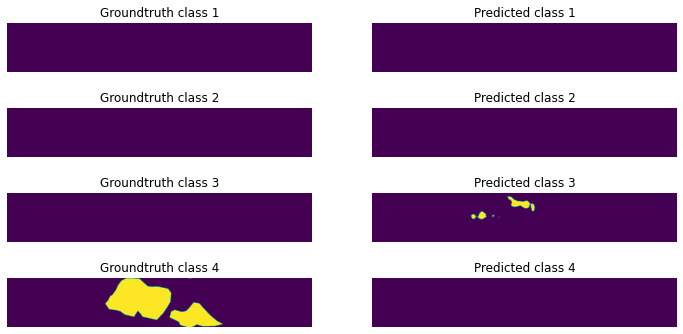

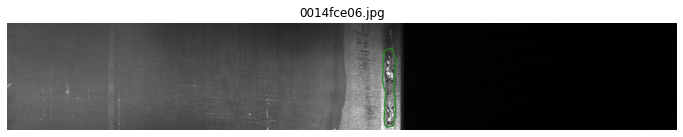

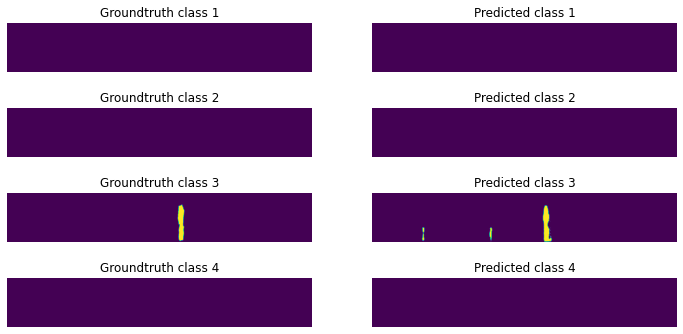

In [ ]:
# predict sample
start_index, end_index = 1, 5
for i in range(start_index, end_index):
#     show_mask_image(i, contour=True)
#     show_predict_img("train_df", i)
    plot_pred_and_target_mask(i)

**Pre trained Models**

In [24]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

In [25]:
def model_m():
    inputs = Input(shape=(256, 1600, 3), name="input_image")
    
    encoder = MobileNetV2(input_tensor=inputs, weights="imagenet", include_top=False, alpha=0.35)
    skip_connection_names = ["input_image", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
    encoder_output = encoder.get_layer("block_13_expand_relu").output
    
    f = [16, 32, 48, 64]
    x = encoder_output
    for i in range(1, len(skip_connection_names)+1, 1):
        x_skip = encoder.get_layer(skip_connection_names[-i]).output
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, x_skip])
        
        x = Conv2D(f[-i], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
        x = Conv2D(f[-i], (3, 3), padding="same")(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)
        
    x = Conv2D(4, (1, 1), padding="same")(x)
    x = Activation("sigmoid")(x)
    
    model_m = Model(inputs, x)
    return model_m

In [26]:
model_m = model_m()
model_m.summary()

2031616/2019640 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256, 1600,   0           []                               
                                3)]                                                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 800, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 800, 16  64          ['Conv1[0][0]']                  
                               

In [27]:
DIRtrain = '/content/drive/MyDrive/Steel/train_images'
def train_data_gen(ids, batch_size):
  Xs = []; Ys = []
  while True:
    for i in ids:
      name, mask = make_mask(i)
      img = cv2.imread(os.path.join(DIRtrain, name))
      # img = img[..., np.newaxis] #Add channel axis (height, width, channel = 1)
      img = img/255 #Normalize pixels in the range 0 - 1
      mask = mask/255
      transformed_img = seq.augment_image(img)
      transformed_mask = seq.augment_image(mask)
      Xs.append(transformed_img); Ys.append(transformed_mask)
      if len(Xs) == batch_size: #if Xs appends till the the batch_size i.e 16
        X = np.array(Xs); Y = np.array(Ys) #list of numpy arrays
        # if preprocess!=None: X = preprocess(X)
        Xs = []; Ys = [] #reset the list for the next batch 
        yield [X, Y] #similar to return fnc, it returns Img with corr. mask in a sequence. Diff betwn yield and return is return stops after it is executed while yield returns in seq without stopping

In [28]:
def val_data_gen(ids, batch_size):
  Xs = []; Ys = []
  while True:
    for i in ids:
      name, mask = make_mask(i)
      img = cv2.imread(os.path.join(DIRtrain, name))
      # img = img[..., np.newaxis] #Add channel axis (height, width, channel = 1)
      img = img/255 #Normalize pixels in the range 0 - 1
      mask = mask/255
      Xs.append(img); Ys.append(mask)
      if len(Xs) == batch_size: #if Xs appends till the the batch_size i.e 16
        X = np.array(Xs); Y = np.array(Ys) #list of numpy arrays
        # if preprocess!=None: X = preprocess(X)
        Xs = []; Ys = [] #reset the list for the next batch 
        yield [X, Y] #similar to return fnc, it returns Img with corr. mask in a sequence. Diff betwn yield and return is return stops after it is executed while yield returns in seq without stopping

In [29]:
# Train Data
import imgaug as ia
import imgaug.augmenters as iaa
seq = iaa.Sequential([ #Augemneting the images
    # iaa.Sharpen((0.0, 1.0)), # sharpen the image
    iaa.Fliplr(),
    iaa.Flipud(),
], random_order=True)
train_ids, val_ids = train_test_split(range(len(train_df)), test_size=0.20, random_state = 42)
train_gen = train_data_gen(train_ids, batch_size = 8)
val_gen = val_data_gen(val_ids, batch_size = 8)

In [30]:
adamax = tf.keras.optimizers.Adamax()
model_m.compile(optimizer= adamax, loss = bce_dice_loss, 
              metrics=[
                 dice_coef
             ])

In [ ]:
BATCH = 8
train_steps = 200
valid_steps = len(val_ids)//BATCH

# if len(train_ids) % BATCH != 0:
#     train_steps += 1
if len(val_ids) % BATCH != 0:
    valid_steps += 1

In [ ]:
model_m.fit(
    train_gen,
    validation_data= val_gen,
    epochs=30,
    shuffle =  True,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks= callbacks_list
)

Epoch 1/30


In [ ]:
history = model_m

In [ ]:
# Plot the loss and dice_coef curves

hist_df = pd.read_csv(history_path)        # Load previous training history

hist_df1 = pd.DataFrame(history.history)[['loss','val_loss','dice_coef','val_dice_coef']]
hist_df = pd.concat([hist_df, hist_df1], ignore_index=True)    # Concat history


# Plot
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(hist_df['loss'], color='b', label="Training loss")
ax[0].plot(hist_df['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist_df['dice_coef'], color='b', label="Training dice_coef")
ax[1].plot(hist_df['val_dice_coef'], color='r',label="Validation dice_coef")
legend = ax[1].legend(loc='best', shadow=True)

NameError: ignored

In [ ]:
# Save history (for next Resume)
hist_df.to_csv("DefectDetection_history.csv", index=False)

NameError: ignored

In [ ]:
# Load the weights that had the best score for predict

model_m.load_weights("/content/defect_detection.h5")

In [ ]:
# Binarize the mask output by NN
def binarize(masks, th = 0.5):
    # Maximum value of each channel per pixel
    mask_max = np.zeros_like(masks[:,:,0])
    mask_max = np.fmax(masks[:,:,0],masks[:,:,1])
    mask_max = np.fmax(mask_max,masks[:,:,2])
    mask_max = np.fmax(mask_max,masks[:,:,3])
    # Remove non-maximum pixels
    m = np.zeros_like(masks)
    for ch in range(4):
        m[:,:,ch] = (masks[:,:,ch] == mask_max) * masks[:,:,ch]
    # Binarization
    m = (m>th) * 1
    return m

In [ ]:
def plot_pred_and_target_mask(idx): # idx
    name = train_df.iloc[idx].name
    img = cv2.imread(os.path.join(DIRtrain, name))
    name, mask = make_mask(idx) # true mask

    # img_ = img[..., np.newaxis]    # Add channel axis
    img_ = img[np.newaxis, ...]    # Add batch axis
    img_ = img_ / 255.              # 0～1
    mask = mask / 255.
    pred_masks = model_m.predict(img_)
    bin_masks = binarize(pred_masks[0, ...], 0.5)
    
    show_mask_image(idx, contour=True)
    fig, axs = plt.subplots(4,2, figsize=(12, 6))

    for i in range(4):
        axs[i,0].imshow(mask[:,:,i])
        axs[i,0].axis('off')
        axs[i,0].set_title('Groundtruth class '+ str(i+1))
        axs[i,1].imshow(bin_masks[:,:,i])
        axs[i,1].axis('off')
        axs[i,1].set_title('Predicted class '+ str(i+1))

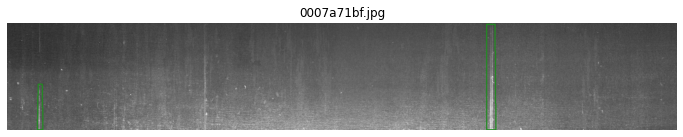

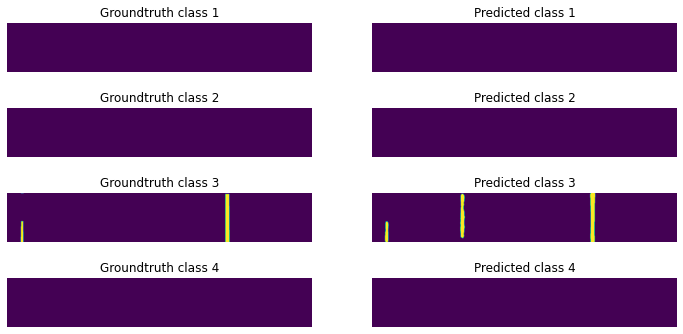

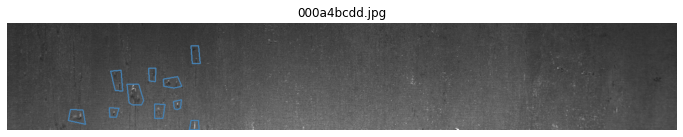

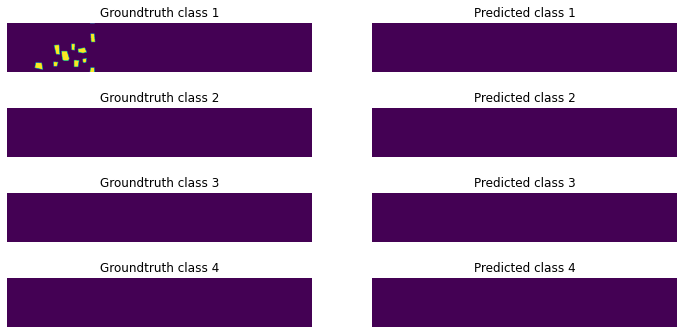

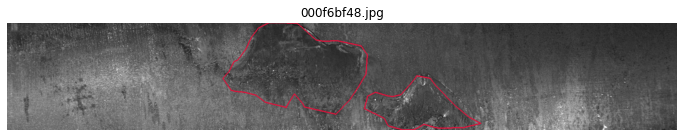

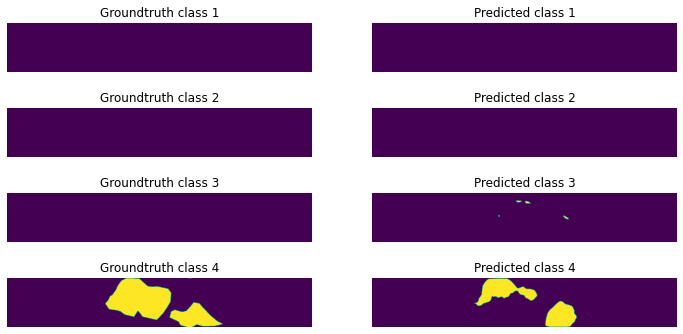

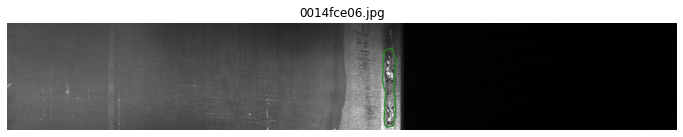

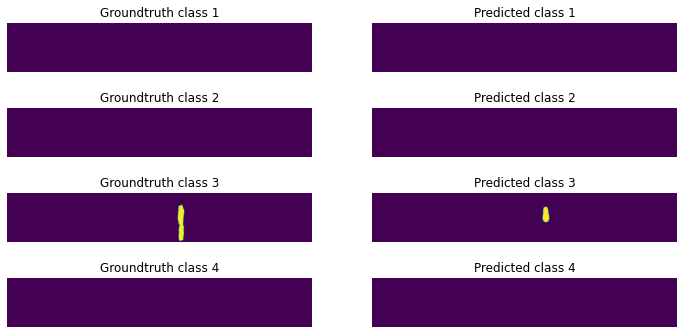

In [ ]:
# predict sample
start_index, end_index = 1, 5
for i in range(start_index, end_index):
#     show_mask_image(i, contour=True)
#     show_predict_img("train_df", i)
    plot_pred_and_target_mask(i)

In [32]:
BATCH = 8
train_steps = 200
valid_steps = len(val_ids)//BATCH

# if len(train_ids) % BATCH != 0:
#     train_steps += 1
if len(val_ids) % BATCH != 0:
    valid_steps += 1

In [33]:
history = model_m.fit(
    train_gen,
    validation_data= val_gen,
    epochs=50,
    shuffle =  True,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks= callbacks_list
)

Epoch 1/50
200/200 [==============================] - ETA: 0s - loss: 1.2699 - dice_coef: 0.0716
Epoch 1: val_dice_coef improved from -inf to 0.03917, saving model to defect_detection.h5
200/200 [==============================] - 1069s 5s/step - loss: 1.2699 - dice_coef: 0.0716 - val_loss: 1.1501 - val_dice_coef: 0.0392 - lr: 0.0010
Epoch 2/50
200/200 [==============================] - ETA: 0s - loss: 0.9338 - dice_coef: 0.1858
Epoch 2: val_dice_coef improved from 0.03917 to 0.09297, saving model to defect_detection.h5
200/200 [==============================] - 612s 3s/step - loss: 0.9338 - dice_coef: 0.1858 - val_loss: 0.9839 - val_dice_coef: 0.0930 - lr: 0.0010
Epoch 3/50
200/200 [==============================] - ETA: 0s - loss: 0.6638 - dice_coef: 0.3888
Epoch 3: val_dice_coef improved from 0.09297 to 0.24353, saving model to defect_detection.h5
200/200 [==============================] - 622s 3s/step - loss: 0.6638 - dice_coef: 0.3888 - val_loss: 0.8259 - val_dice_coef: 0.2435 - lr

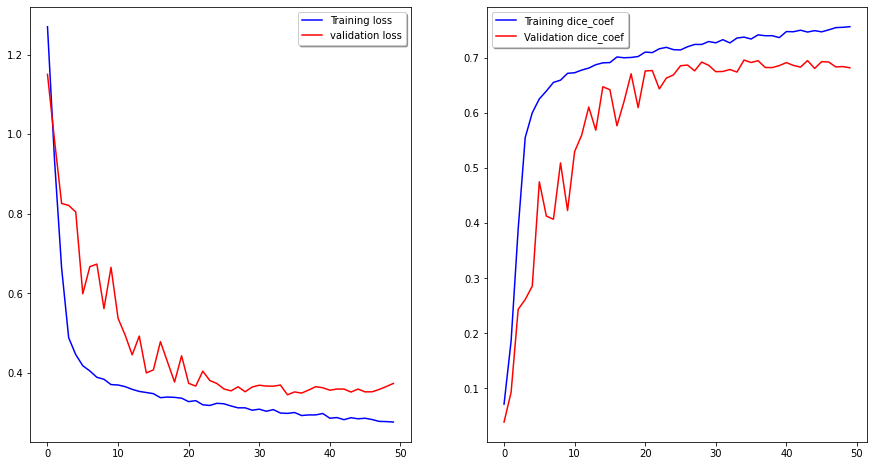

In [45]:
# Plot the loss and dice_coef curves

# hist_df = pd.read_csv(history_path)        # Load previous training history
# if RESUME and os.path.exists(history_path):
#     hist_df1 = pd.DataFrame(history.history)[['loss','val_loss','dice_coef','val_dice_coef']]
#     hist_df = pd.concat([hist_df, hist_df1], ignore_index=True)    # Concat history
# elif NoTRAIN == False and RESUME == False:
hist_df = pd.DataFrame(history.history)[['loss','val_loss','dice_coef','val_dice_coef']]

# Plot
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(hist_df['loss'], color='b', label="Training loss")
ax[0].plot(hist_df['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist_df['dice_coef'], color='b', label="Training dice_coef")
ax[1].plot(hist_df['val_dice_coef'], color='r',label="Validation dice_coef")
legend = ax[1].legend(loc='best', shadow=True)

In [35]:
# Load the weights that had the best score for predict

model_m.load_weights("/content/defect_detection.h5")

In [36]:
# Binarize the mask output by NN
def binarize(masks, th = 0.5):
    # Maximum value of each channel per pixel
    mask_max = np.zeros_like(masks[:,:,0])
    mask_max = np.fmax(masks[:,:,0],masks[:,:,1])
    mask_max = np.fmax(mask_max,masks[:,:,2])
    mask_max = np.fmax(mask_max,masks[:,:,3])
    # Remove non-maximum pixels
    m = np.zeros_like(masks)
    for ch in range(4):
        m[:,:,ch] = (masks[:,:,ch] == mask_max) * masks[:,:,ch]
    # Binarization
    m = (m>th) * 1
    return m

In [56]:
def plot_pred_and_target_mask(idx): # idx
    name = train_df.iloc[idx].name
    img = cv2.imread(os.path.join(DIRtrain, name))
    name, mask = make_mask(idx) # true mask

    # img_ = img[..., np.newaxis]    # Add channel axis
    img_ = img[np.newaxis, ...]    # Add batch axis
    img_ = img_ / 255.              # 0～1
    mask = mask / 255.
    pred_masks = model_m.predict(img_)
    bin_masks = binarize(pred_masks[0, ...], 0.5)
    
    show_mask_image(idx, contour=True)
    fig, axs = plt.subplots(4,1, figsize=(12, 10))

    for i in range(4):
        axs[i].imshow(bin_masks[:,:,i])
        axs[i].axis('off')
        axs[i].set_title('Predicted class '+ str(i+1))

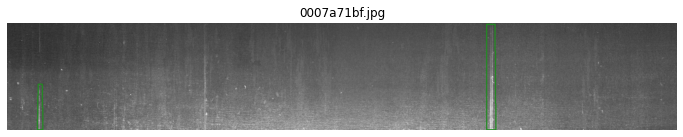

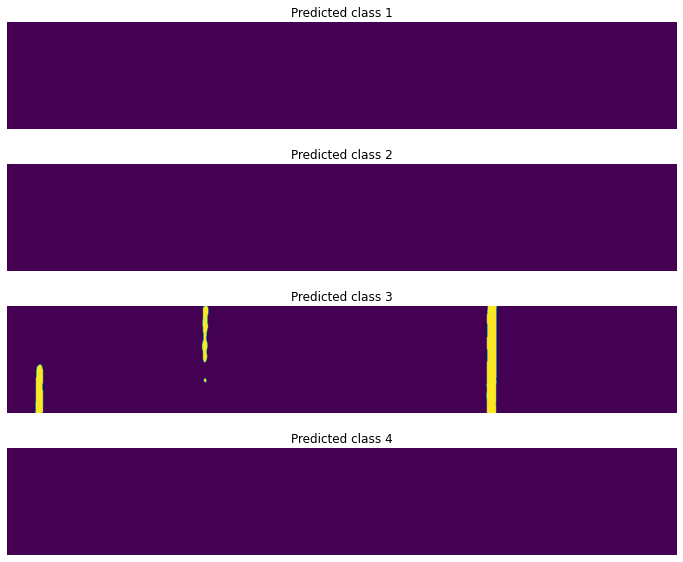

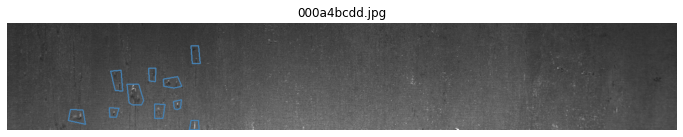

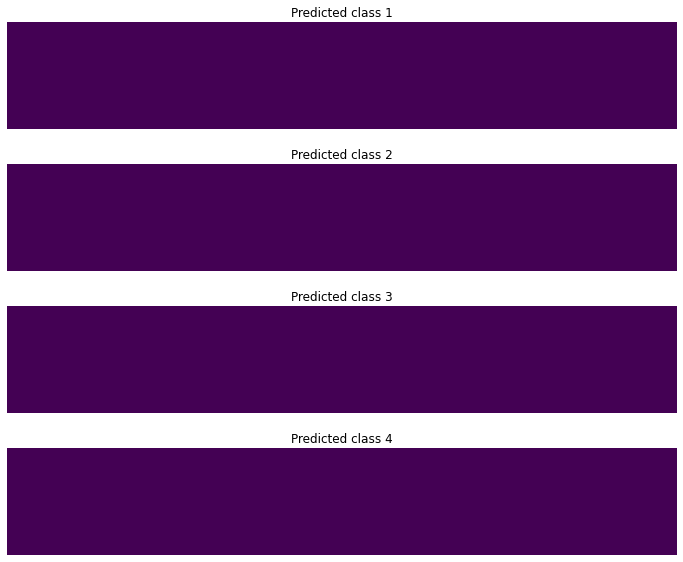

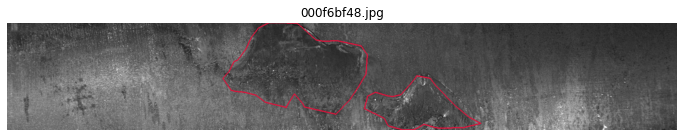

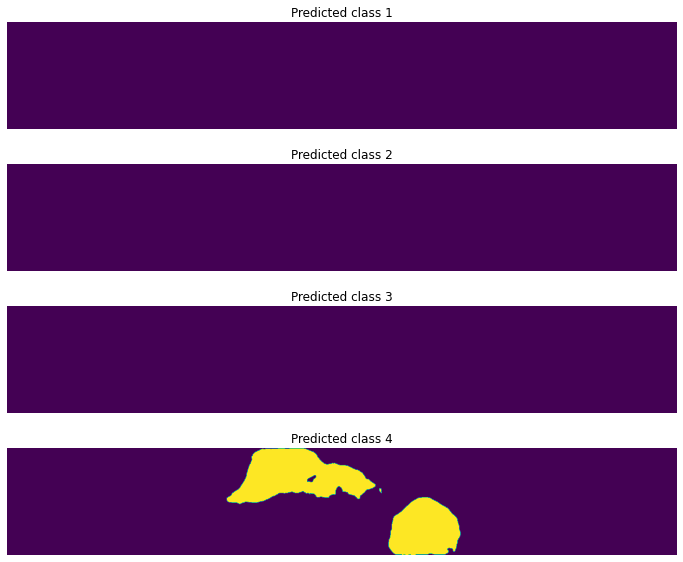

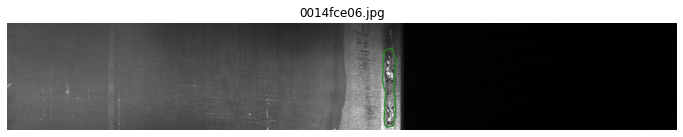

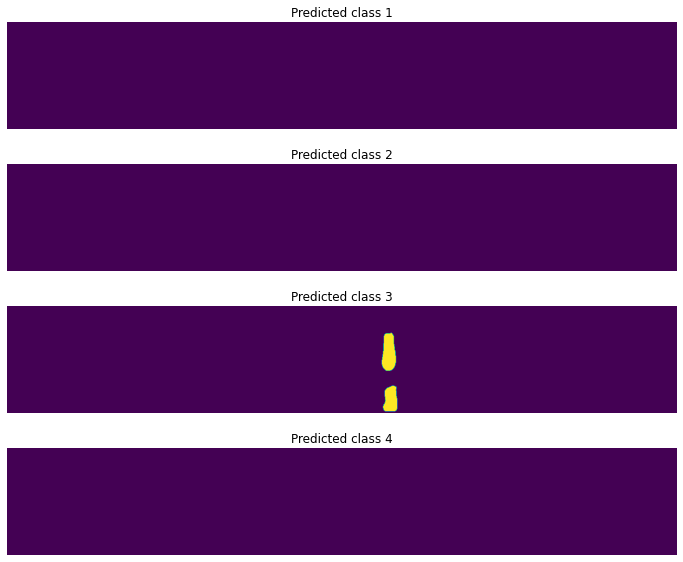

In [57]:
# predict sample
start_index, end_index = 1, 5
for i in range(start_index, end_index):
#     show_mask_image(i, contour=True)
#     show_predict_img("train_df", i)
    plot_pred_and_target_mask(i)

In [52]:
def plot_pred_and_target_mask(idx): # idx
    name = train_df.iloc[idx].name
    img = cv2.imread(os.path.join(DIRtrain, name))
    name, mask = make_mask(idx) # true mask

    # img_ = img[..., np.newaxis]    # Add channel axis
    img_ = img[np.newaxis, ...]    # Add batch axis
    img_ = img_ / 255.              # 0～1
    mask = mask / 255.
    pred_masks = model_m.predict(img_)
    bin_masks = binarize(pred_masks[0, ...], 0.5)
    
    show_mask_image(idx, contour=True)
    fig, axs = plt.subplots(4,1, figsize=(12, 10))

    for i in range(4):
        axs[i].imshow(mask[:,:,i])
        axs[i].axis('off')
        axs[i].set_title('Predicted class '+ str(i+1))
        

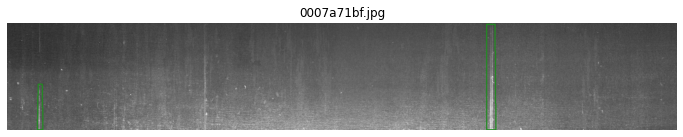

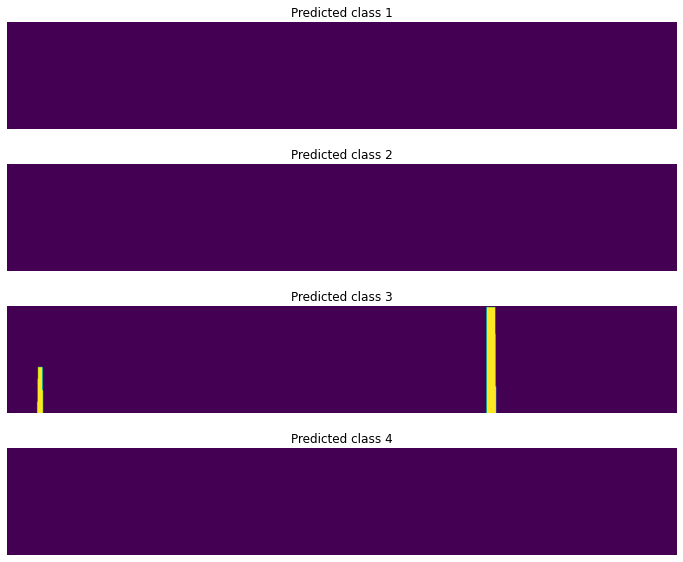

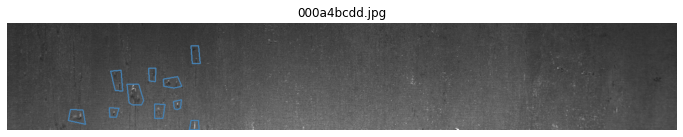

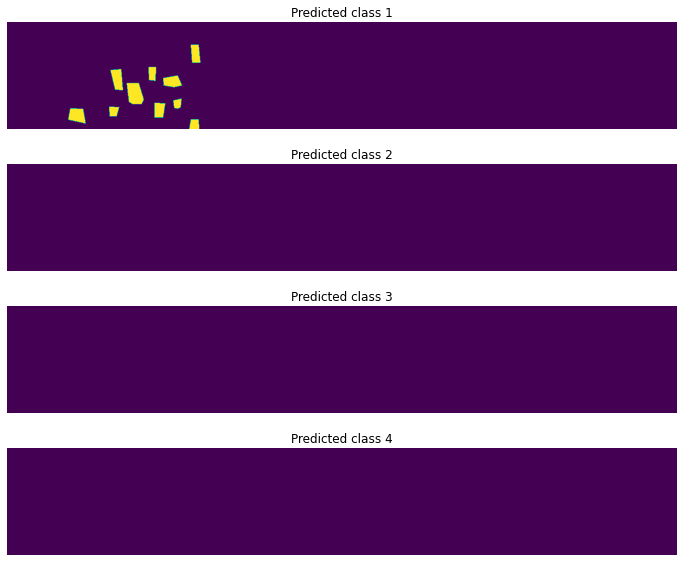

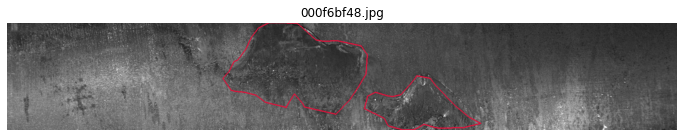

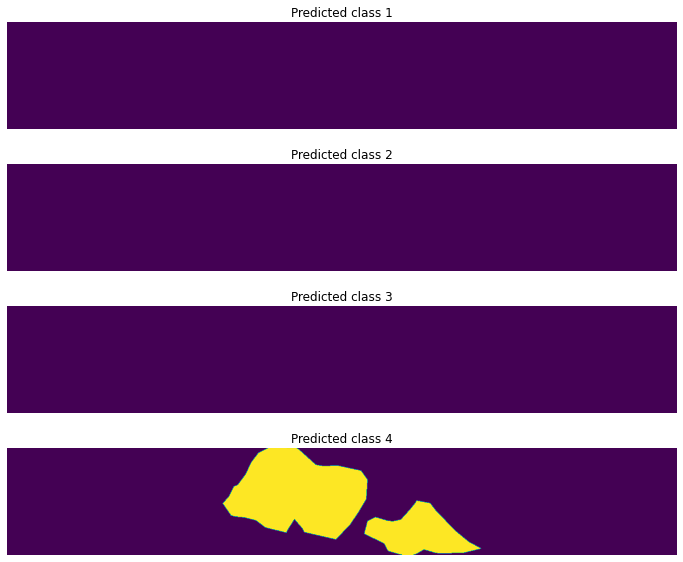

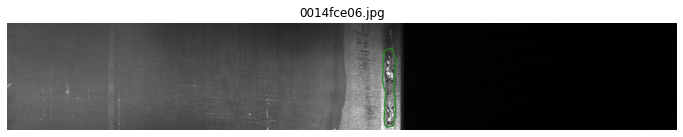

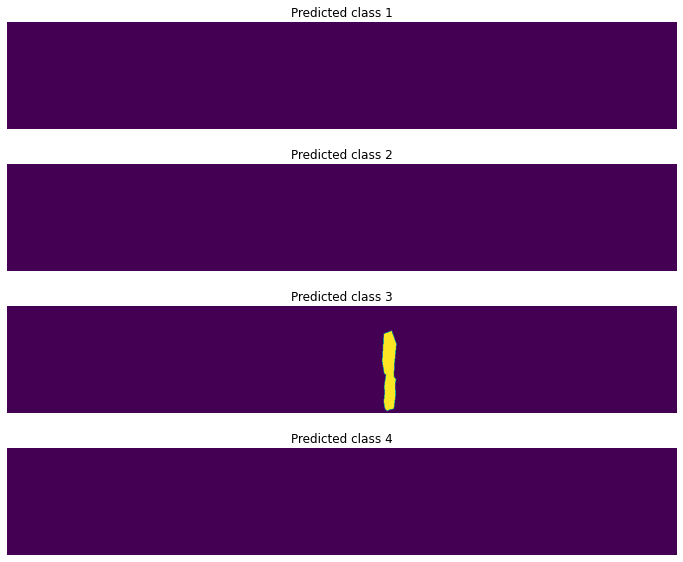

In [53]:
# predict sample
start_index, end_index = 1, 5
for i in range(start_index, end_index):
#     show_mask_image(i, contour=True)
#     show_predict_img("train_df", i)
    plot_pred_and_target_mask(i)